# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm

In [2]:
# %matplotlib inline

# from IPython.core.pylabtools import figsize


# figsize(12, 8)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
height = get_sample(athletes, "height", 3000)

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [6]:
def q1():
    # Retorne aqui o resultado da questão 1.
    return sct.shapiro(height)[1] > 0.05

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

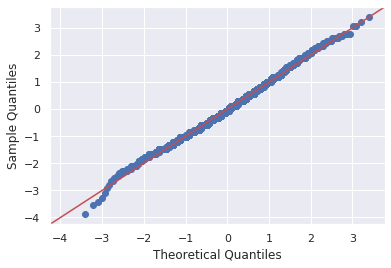

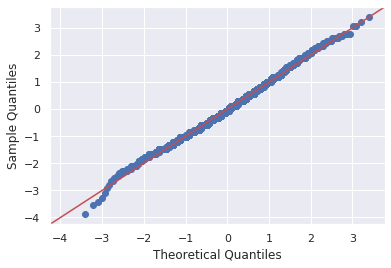

In [7]:
sm.qqplot(height, fit=True, line="45")

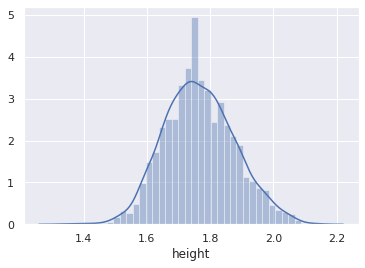

In [8]:
sns.distplot(height)

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [9]:
def q2():
    # Retorne aqui o resultado da questão 2.
    return sct.jarque_bera(height)[1] > 0.05

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [10]:
weight = get_sample(athletes, "weight", 3000)
log_weight = np.log(weight)

In [11]:
def q3():
    # Retorne aqui o resultado da questão 3.
    return sct.normaltest(weight)[1] > 0.05

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

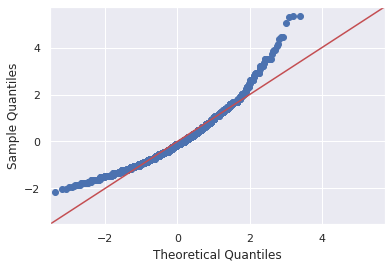

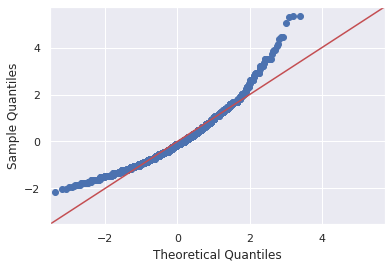

In [12]:
sm.qqplot(weight, fit=True, line="45")

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [13]:
def q4():
    # Retorne aqui o resultado da questão 4.
    return sct.normaltest(log_weight)[1] > 0.05

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

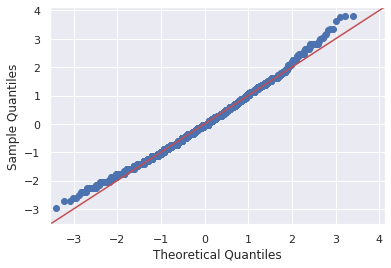

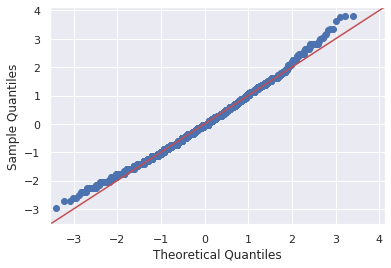

In [14]:
sm.qqplot(log_weight, fit=True, line="45")

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

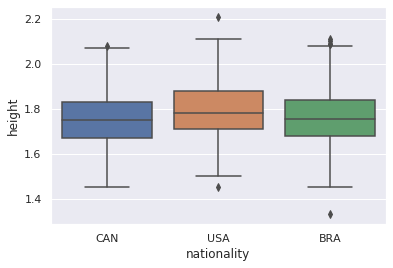

In [15]:
bra = athletes[athletes["nationality"] == "BRA"]["height"].dropna()
usa = athletes[athletes["nationality"] == "USA"]["height"].dropna()
can = athletes[athletes["nationality"] == "CAN"]["height"].dropna()

athletes_sub = athletes[athletes["nationality"].isin(["USA", "BRA", "CAN"])]
sns.boxplot(x="nationality", y="height", data=athletes_sub)

In [16]:
athletes_sub.groupby("nationality")["height"].agg(["mean", "std"])
print("Testes de homocedasticidade de variância")
print("BRA x USA: %f" % sct.levene(bra, usa)[1])
print("BRA x CAN: %f" % sct.levene(bra, can)[1])
print("USA x CAN: %f" % sct.levene(usa, can)[1])

Testes de homocedasticidade de variância
BRA x USA: 0.536612
BRA x CAN: 0.935603
USA x CAN: 0.641799


In [17]:
def q5():
    # Retorne aqui o resultado da questão 5.
    return sct.ttest_ind(bra, usa, equal_var=False, nan_policy="omit")[1] > 0.05

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [18]:
def q6():
    # Retorne aqui o resultado da questão 6.
    return sct.ttest_ind(bra, can, equal_var=False, nan_policy="omit")[1] > 0.05

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [19]:
def q7():
    # Retorne aqui o resultado da questão 7.
    return sct.ttest_ind(usa, can, equal_var=False, nan_policy="omit")[1].round(8)

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?